In [122]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [123]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device {device}")

Using device cpu


Data(linear regression)

In [124]:
weight=0.7
bias=0.3
X=torch.arange(0,1,0.001).unsqueeze(dim=1)
y=weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0010],
         [0.0020],
         [0.0030],
         [0.0040],
         [0.0050],
         [0.0060],
         [0.0070],
         [0.0080],
         [0.0090]]),
 tensor([[0.3000],
         [0.3007],
         [0.3014],
         [0.3021],
         [0.3028],
         [0.3035],
         [0.3042],
         [0.3049],
         [0.3056],
         [0.3063]]))

In [125]:
len(X),len(y)

(1000, 1000)

In [126]:
train_split=int(0.75*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

In [127]:
def ploting(train_data=X_train,train_labels=y_train,
            test_data=X_test,test_labels=y_test,
            predictions=None):
  plt.figure(figsize=(25,10))
  plt.scatter(train_data,train_labels,c='y',s=4,label="Training Data")
  plt.scatter(test_data,test_labels,c='b',s=5,label="testing Data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c='g',s=7,label="Predictions")
  plt.legend(loc="upper left")

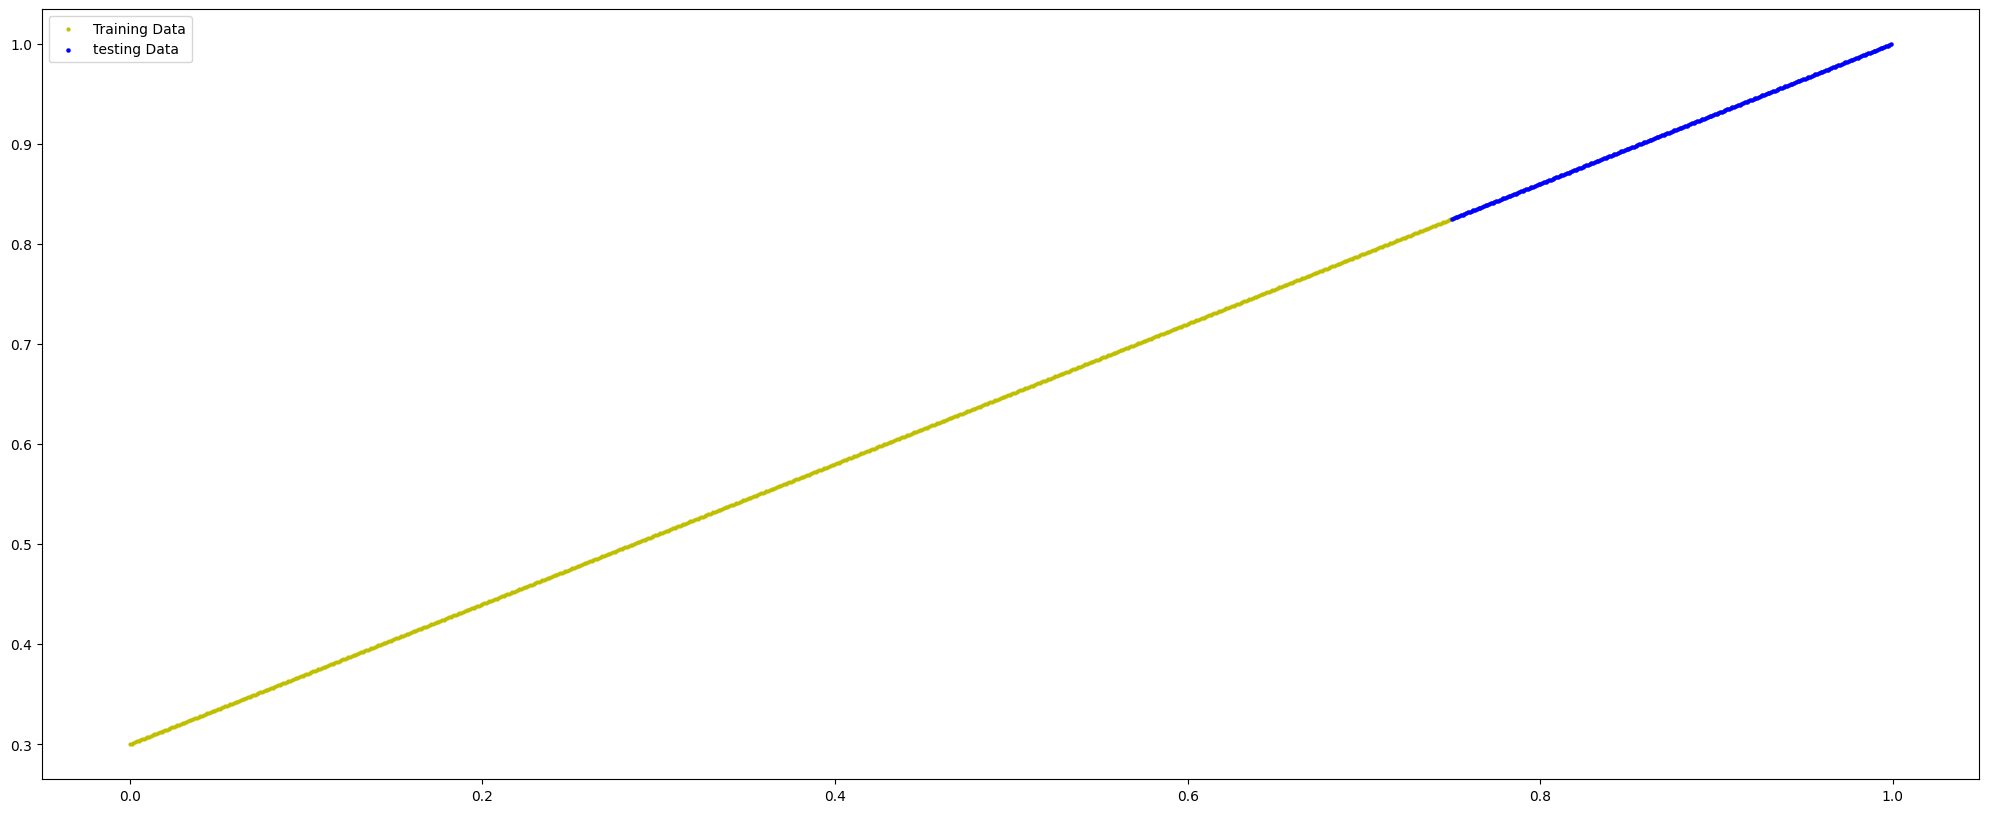

In [128]:
ploting()

Model(Linear)

In [129]:
class LinearRegressionV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(in_features=1,out_features=1)
  def forward(self,x):
    return self.linear(x)

torch.manual_seed(420)
model0=LinearRegressionV1()
model0.state_dict()

OrderedDict([('linear.weight', tensor([[0.6107]])),
             ('linear.bias', tensor([-0.6019]))])

Training

In [130]:
lossfunc=nn.L1Loss()
optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.01)

In [131]:
torch.manual_seed(420)
epochs=500

for epoch in range(epochs):
  model0.train()
  y_predic=model0(X_train)
  loss=lossfunc(y_predic,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model0.eval()
  with torch.inference_mode():
    test_predic=model0(X_test)
    test_loss=lossfunc(test_predic,y_test)

  if epoch%100==0:
    print(f"Epoch={epoch} \t Loss={loss} \t Test Loss={test_loss}")

Epoch=0 	 Loss=0.9353598356246948 	 Test Loss=0.9667306542396545
Epoch=100 	 Loss=0.03434625640511513 	 Test Loss=0.08505427837371826
Epoch=200 	 Loss=0.0037521515041589737 	 Test Loss=0.008697076700627804
Epoch=300 	 Loss=0.008217559196054935 	 Test Loss=0.004855896811932325
Epoch=400 	 Loss=0.008217559196054935 	 Test Loss=0.004855896811932325


In [132]:
model0.state_dict()

OrderedDict([('linear.weight', tensor([[0.6996]])),
             ('linear.bias', tensor([0.2919]))])

In [133]:
weight,bias

(0.7, 0.3)

In [134]:
model0.eval()
with torch.inference_mode():
  y_predicts=model0(X_test)
y_predicts[:10]

tensor([[0.8166],
        [0.8173],
        [0.8180],
        [0.8187],
        [0.8194],
        [0.8201],
        [0.8208],
        [0.8215],
        [0.8222],
        [0.8229]])

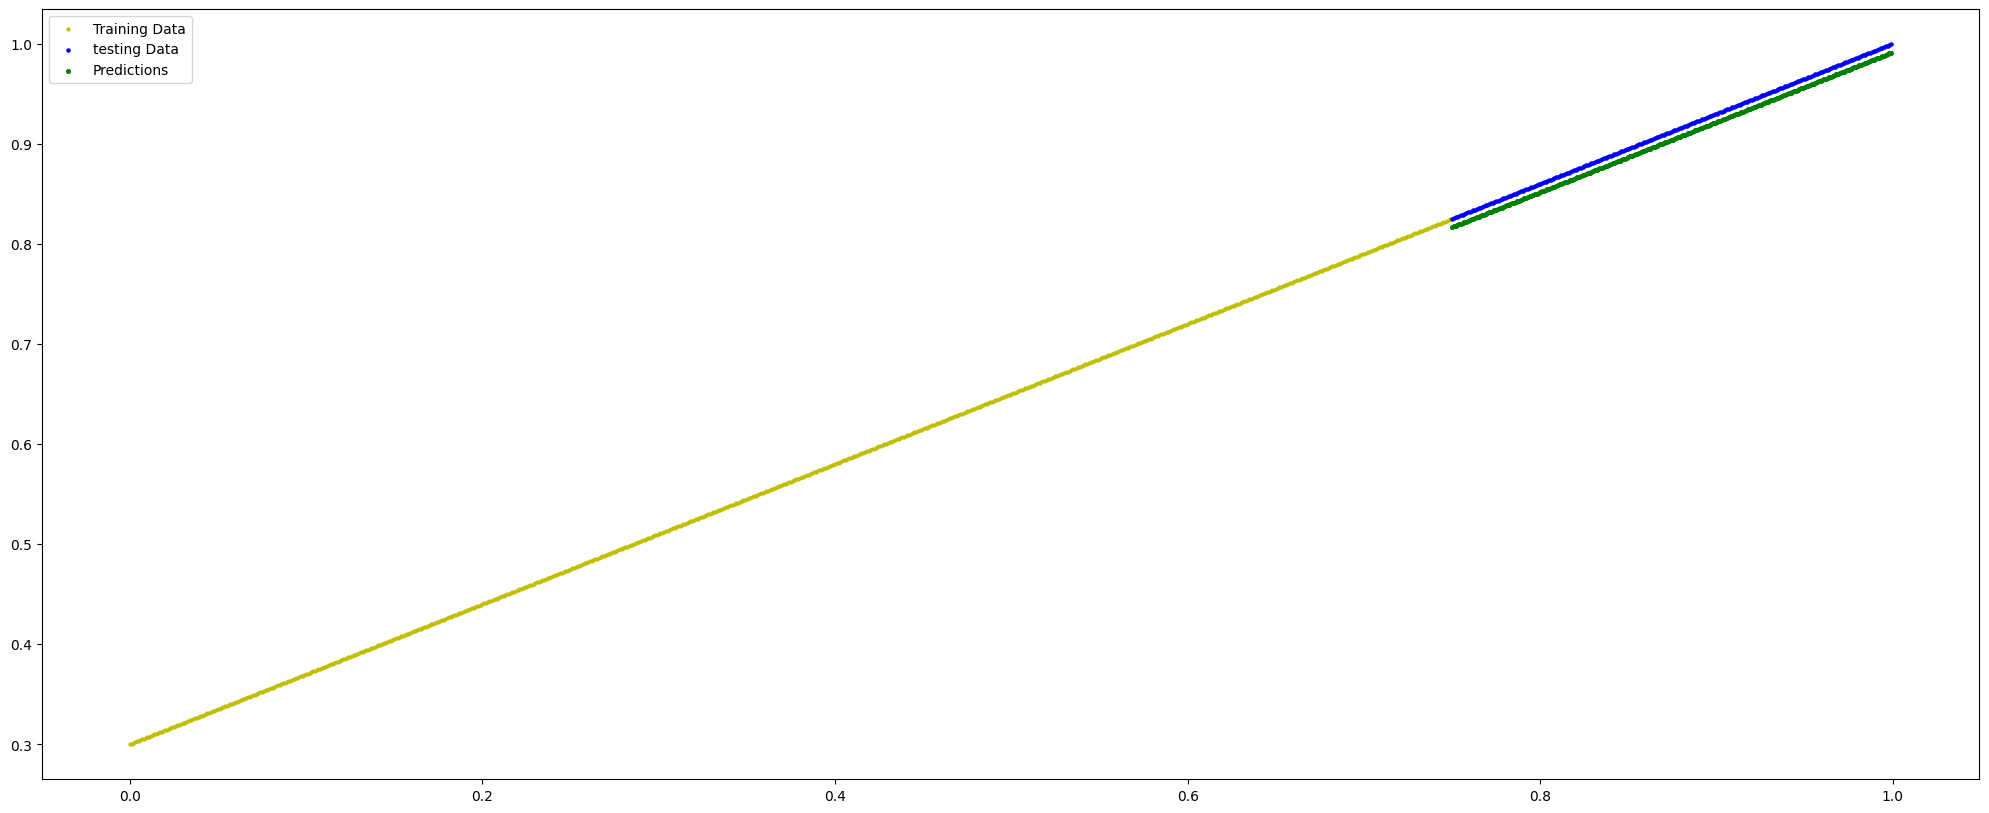

In [135]:
ploting(predictions=y_predicts.cpu().numpy())

In [141]:
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME="01_first_basic_model(linear regression).pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

torch.save(obj=model0.state_dict(),f=MODEL_SAVE_PATH)
print("MOdel saved")

MOdel saved
